In [132]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [133]:
df = pd.read_csv("time_series_ass3.csv")

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [135]:
df.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [136]:
df.tail()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
8635,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
8636,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
8637,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
8638,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8
8639,8639,2023-05-01 23:45:00,2023-05-02 00:00:00,32.0,6.0,21.8


In [138]:
df['From'] = pd.to_datetime(df['From'])

min_date = df['From'].min()
date_range = pd.date_range(start=min_date, periods=len(df), freq='15Min')
df['Date'] = date_range

df.set_index('Date', inplace=True)

display(df.head())


,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
Date,,,,,,
2023-02-01 00:00:00,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
2023-02-01 00:15:00,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2023-02-01 00:30:00,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
2023-02-01 00:45:00,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
2023-02-01 01:00:00,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [139]:
display(df.tail())

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
Date,,,,,,
2023-05-01 22:45:00,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9
2023-05-01 23:00:00,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9
2023-05-01 23:15:00,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6
2023-05-01 23:30:00,8638,2023-05-01 23:30:00,2023-05-01 23:45:00,19.0,11.0,20.8
2023-05-01 23:45:00,8639,2023-05-01 23:45:00,2023-05-02 00:00:00,32.0,6.0,21.8


In [140]:
resampled_df = df.resample('15T').mean()

resampled_df = resampled_df.fillna(np.nan)

display(resampled_df.head())
display(resampled_df.tail())

C:\Users\user\AppData\Local\Temp\ipykernel_19100\2706837213.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample('15T').mean()


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
Date,,,,
2023-02-01 00:00:00,0.0,95.0,35.0,NaN
2023-02-01 00:15:00,1.0,95.0,35.0,NaN
2023-02-01 00:30:00,2.0,95.0,35.0,NaN
2023-02-01 00:45:00,3.0,122.0,34.0,NaN
2023-02-01 01:00:00,4.0,122.0,34.0,NaN


,Unnamed: 0,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
Date,,,,
2023-05-01 22:45:00,8635.0,19.0,11.0,17.9
2023-05-01 23:00:00,8636.0,19.0,11.0,17.9
2023-05-01 23:15:00,8637.0,19.0,11.0,19.6
2023-05-01 23:30:00,8638.0,19.0,11.0,20.8
2023-05-01 23:45:00,8639.0,32.0,6.0,21.8


In [142]:
interpolated_df = resampled_df.interpolate(method='linear')

forward_filled_df = resampled_df.fillna(method='ffill')

backward_filled_df = resampled_df.fillna(method='bfill')


In [143]:
from statsmodels.tsa.arima.model import ARIMA

endog = interpolated_df.iloc[:, 0]

p = 1
d = 1
q = 1

model = ARIMA(endog, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:             Unnamed: 0   No. Observations:                 8640
Model:                 ARIMA(1, 1, 1)   Log Likelihood           -28525194.303
Date:                Thu, 13 Jul 2023   AIC                       57050394.606
Time:                        23:40:31   BIC                       57050415.798
Sample:                    02-01-2023   HQIC                      57050401.832
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       8.612e-07   7.56e-05      0.011      0.991      -0.000       0.000
ma.L1       8.611e-07   7.56e-05      0.011      0.991      -0.000       0.000
sigma2         0.0002   4.58e-08   3304.897      0.0

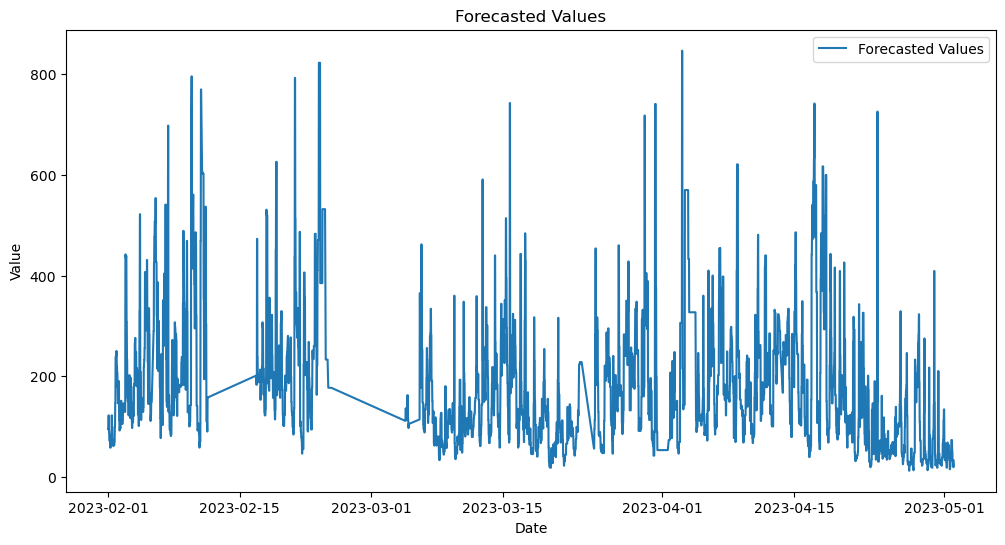

In [144]:
forecast_values = model_fit.forecast(steps=len(df) - len(interpolated_df) + 1)[0]

forecast_df = pd.DataFrame(forecast_values, index=interpolated_df.index, columns=['Forecast'])

combined_df = pd.concat([interpolated_df, forecast_df])

plt.figure(figsize=(12,6))
plt.plot(combined_df.index, combined_df['PM10 (µg/m3)'],label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()



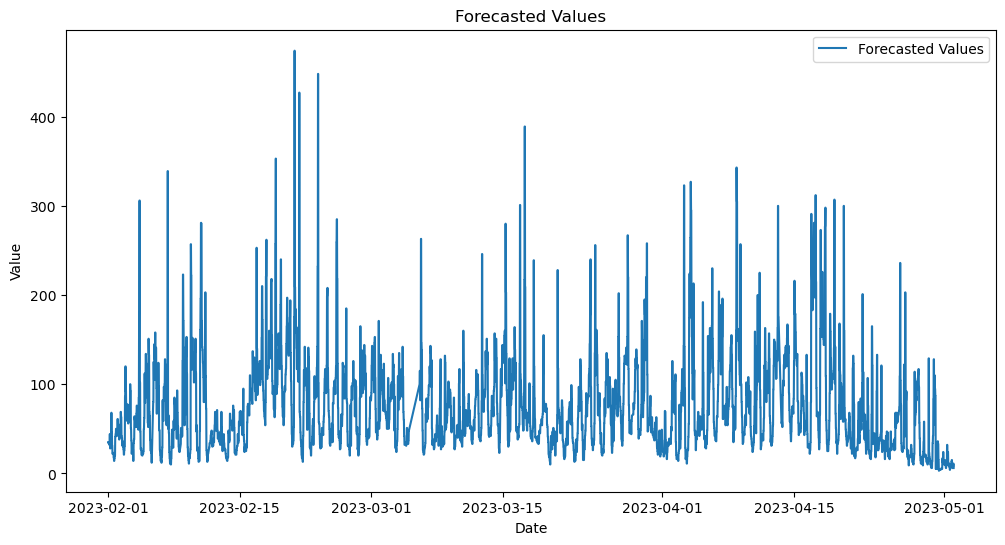

In [145]:
forecast_values = model_fit.forecast(steps=len(df) - len(interpolated_df) + 1)[0]

forecast_df = pd.DataFrame(forecast_values, index=interpolated_df.index, columns=['Forecast'])

combined_df = pd.concat([interpolated_df, forecast_df])

plt.figure(figsize=(12,6))
plt.plot(combined_df.index, combined_df['PM2.5 (µg/m3)'], label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()



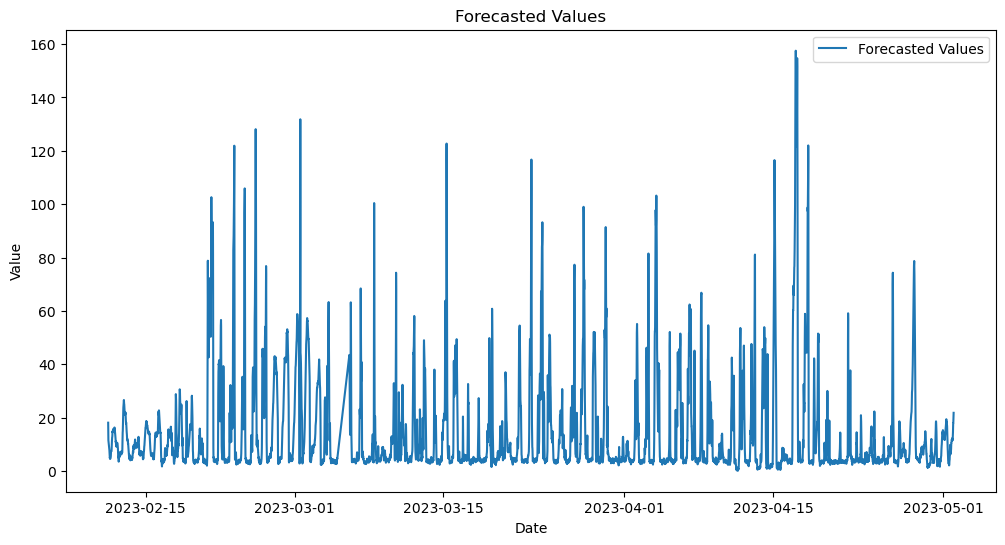

In [146]:

forecast_values = model_fit.forecast(steps=len(df) - len(interpolated_df) + 1)[0]

forecast_df = pd.DataFrame(forecast_values, index=interpolated_df.index, columns=['Forecast'])

combined_df = pd.concat([interpolated_df, forecast_df])

plt.figure(figsize=(12,6))
plt.plot(combined_df.index, combined_df['NO (µg/m3)'], label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()



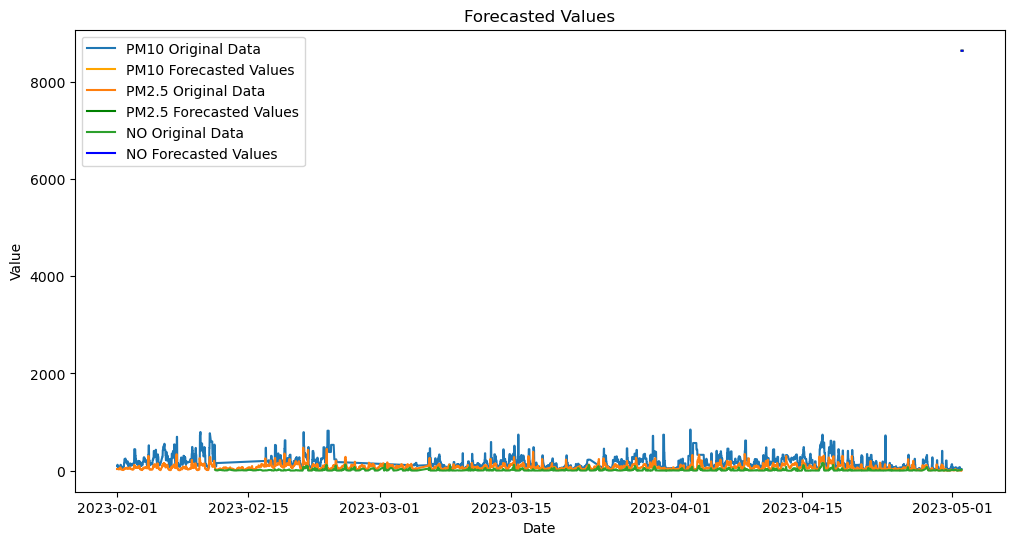

In [148]:
forecast_horizon = 10

forecast_values_pm10 = model_fit.forecast(steps=forecast_horizon)[0]
forecast_values_pm25 = model_fit.forecast(steps=forecast_horizon)[0]
forecast_values_no = model_fit.forecast(steps=forecast_horizon)[0]

forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_horizon+1, freq='15T')[1:]

forecast_df_pm10 = pd.DataFrame(forecast_values_pm10, index=forecast_dates, columns=['Forecast_PM10'])
forecast_df_pm25 = pd.DataFrame(forecast_values_pm25, index=forecast_dates, columns=['Forecast_PM2.5'])
forecast_df_no = pd.DataFrame(forecast_values_no, index=forecast_dates, columns=['Forecast_NO'])

combined_df_pm10 = pd.concat([interpolated_df, forecast_df_pm10], axis=1)
combined_df_pm25 = pd.concat([interpolated_df, forecast_df_pm25], axis=1)
combined_df_no = pd.concat([interpolated_df, forecast_df_no], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(combined_df_pm10.index, combined_df_pm10['PM10 (µg/m3)'], label='PM10 Original Data')
plt.plot(combined_df_pm10.index, combined_df_pm10['Forecast_PM10'], label='PM10 Forecasted Values', color='orange')

plt.plot(combined_df_pm25.index, combined_df_pm25['PM2.5 (µg/m3)'], label='PM2.5 Original Data')
plt.plot(combined_df_pm25.index, combined_df_pm25['Forecast_PM2.5'], label='PM2.5 Forecasted Values', color='green')

plt.plot(combined_df_no.index, combined_df_no['NO (µg/m3)'], label='NO Original Data')
plt.plot(combined_df_no.index, combined_df_no['Forecast_NO'], label='NO Forecasted Values', color='blue')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()


In [149]:
df.loc[df['NO (µg/m3)'].isnull(), 'Forecasted Values'] = forecast_df['Forecast']


display(df)

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),Forecasted Values
Date,,,,,,,
2023-02-01 00:00:00,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,8639.000002
2023-02-01 00:15:00,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,8639.000002
2023-02-01 00:30:00,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,8639.000002
2023-02-01 00:45:00,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,8639.000002
2023-02-01 01:00:00,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,8639.000002
...,...,...,...,...,...,...,...
2023-05-01 22:45:00,8635,2023-05-01 22:45:00,2023-05-01 23:00:00,19.0,11.0,17.9,NaN
2023-05-01 23:00:00,8636,2023-05-01 23:00:00,2023-05-01 23:15:00,19.0,11.0,17.9,NaN
2023-05-01 23:15:00,8637,2023-05-01 23:15:00,2023-05-01 23:30:00,19.0,11.0,19.6,NaN
